In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Aula 1 - Distribuição de frequências qualitativas - Método 1

In [26]:
dados = pd.read_csv("dados.csv")
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


In [27]:
freq_sexo = dados.Sexo.value_counts()
freq_sexo

Sexo
0    53250
1    23590
Name: count, dtype: int64

In [28]:
porcent_sexo = dados.Sexo.value_counts(normalize=True) * 100
porcent_sexo

Sexo
0    69.299844
1    30.700156
Name: proportion, dtype: float64

In [29]:
dist_freq_sexo = pd.DataFrame({"Porcentagem (%)":frequencia_sexo,"Frequência":ocorrencia_sexo})
dist_freq_sexo

,Porcentagem (%),Frequência
Sexo,,
0,69.299844,53250
1,30.700156,23590


In [30]:
dist_freq_sexo.rename(index = {0:'Masculino',1:'Feminino'},inplace=True)
dist_freq_sexo.rename_axis('Sexo',axis = 1, inplace = True)
dist_freq_sexo

Sexo,Porcentagem (%),Frequência
Sexo,,
Masculino,69.299844,53250
Feminino,30.700156,23590


# Aula 2 - Distribuição de frequências qualitativas - Método 2

In [31]:
sexo = {0 : 'Masculino', 1 : 'Feminino'}
cor = {0 : 'Indígena',
        2 : 'Branca',
        4 : 'Preta',
        6 : 'Amarela',
        8 : 'Parda',
        9 : 'Sem declaração'}

In [32]:
cross_freq = pd.crosstab(dados.Sexo, dados.Cor, normalize = True) * 100
cross_freq.rename(index = sexo, inplace = True)
cross_freq.rename(columns = cor, inplace = True)
cross_freq

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


# Distribuição de frequências quantitativas - Classes personalizadas

In [33]:
dados.Renda.min()

0

In [34]:
dados.Renda.max()

200000

In [35]:
bins = [0, 1576, 3152, 7880, 15760, 200000]
labels = ['E', 'D', 'C', 'B', 'A']

In [36]:
renda_cutted = pd.cut(x = dados.Renda, bins = bins, labels = labels, include_lowest = True)

In [50]:
dist_porcent_renda_cutted = renda_cutted.value_counts(normalize = True) * 100
dist_freq_renda_cutted = renda_cutted.value_counts()
dist_freq_renda_cutted

Renda
E    49755
D    16700
C     7599
B     2178
A      608
Name: count, dtype: int64

In [51]:
dist_freq_renda_cutted = pd.DataFrame({'Frequência':dist_freq_renda_cutted,'Porcentagem (%)':dist_porcent_renda_cutted}).sort_index(ascending = False)
dist_freq_renda_cutted

,Frequência,Porcentagem (%)
Renda,,
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


Text(0, 0.5, 'Porcentagem (%)')

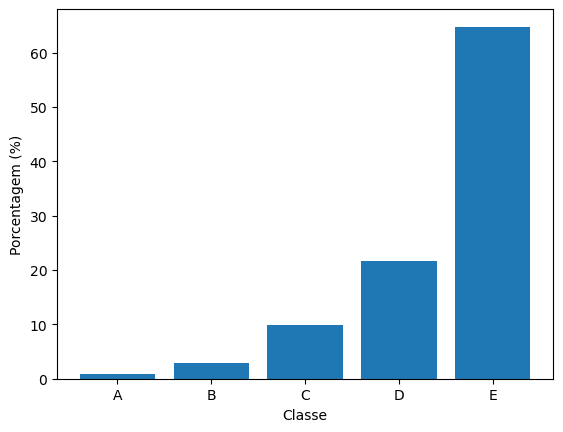

In [54]:
plt.bar(dist_freq_renda_cutted.index.values,dist_freq_renda_cutted['Porcentagem (%)'].values)
plt.xlabel('Classe')
plt.ylabel('Porcentagem (%)')

In [48]:
bins = [dados.Altura.min(), 1.65, 1.75, dados.Altura.max()]
labels = ['1 - Baixa', '2 - Média', '3 - Alta']

freq_altura_cutted = pd.value_counts(
    pd.cut(
        x = dados.Altura,
        bins = bins,
        labels = labels,
        include_lowest = True
    )
)

porcent_altura_cutted = pd.value_counts(
    pd.cut(
        x = dados.Altura,
        bins = bins,
        labels = labels,
        include_lowest = True
    ), normalize = True
) * 100

dist_freq_altura = pd.DataFrame(
    {'Frequência': freq_altura_cutted, 'Porcentagem (%)': porcent_altura_cutted}
)

dist_freq_altura.rename_axis('Estaturas', axis= 'columns', inplace = True)

dist_freq_altura.sort_index(ascending = True, inplace = True)

dist_freq_altura

Estaturas,Frequência,Porcentagem (%)
Altura,,
1 - Baixa,20529,26.716554
2 - Média,36162,47.061426
3 - Alta,20149,26.222020


# 4 Classes de amplitude fixa

$ k =  1 + \frac{10}{3}log _{10} n$

In [40]:
n = dados.shape[0]
n

76840

In [41]:
k = 1 + 10 / 3 * np.log10(n)
k = int(k)

In [42]:
dist_quant = pd.cut(x = dados.Renda, bins = k, include_lowest= True).value_counts(sort = False)
dist_quant

Renda
(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: count, dtype: int64

<Axes: >

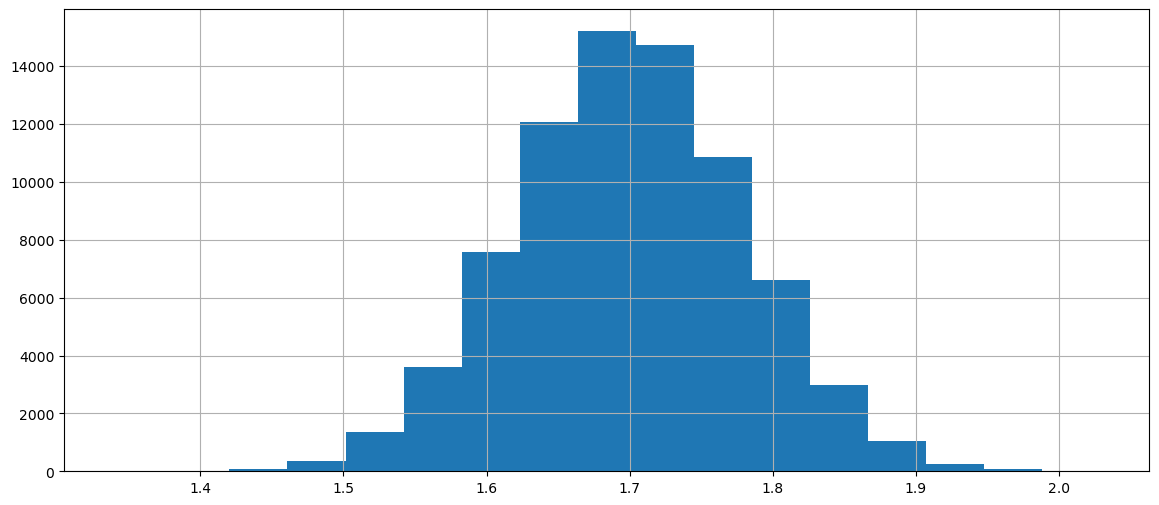

In [43]:
dados.Altura.hist(bins = k, figsize = (14,6))

<Axes: title={'center': 'Distribuição de frequência'}, xlabel='Altura (m)', ylabel='Contagem'>

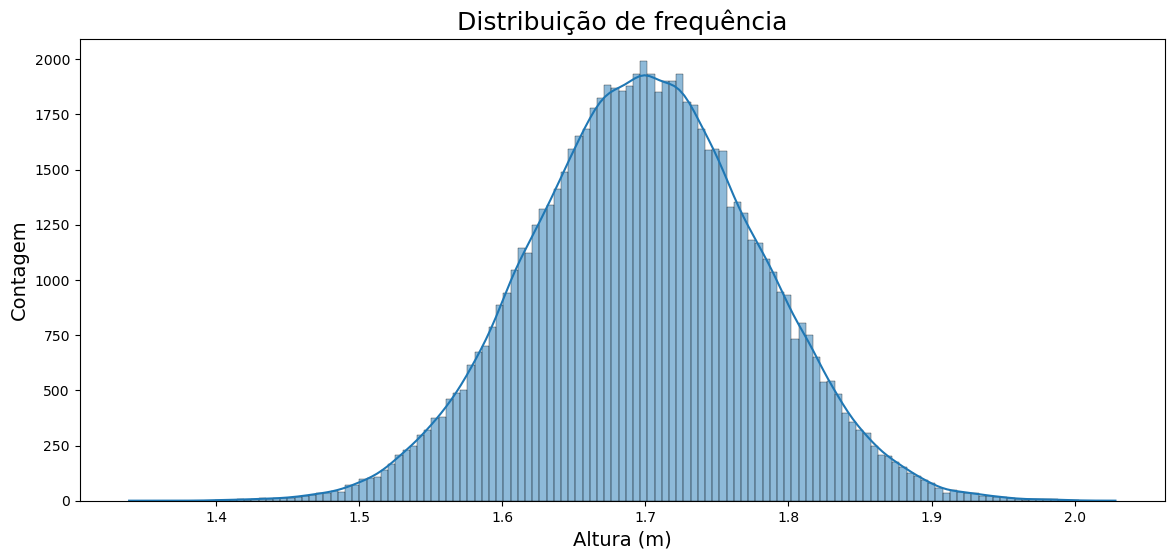

In [44]:
ax = sns.histplot(dados.Altura, kde = True)
ax.set_title('Distribuição de frequência', fontsize = 18)
ax.set_xlabel('Altura (m)', fontsize = 14)
ax.set_ylabel('Contagem', fontsize = 14)
ax.figure.set_size_inches(14,6)
ax